# Transfer Learning CIFAR10

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

<img src="1.jpg">

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [2]:
pip install keras-vis

Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import applications
from keras.models import Sequential, Model 
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras as keras
import vis

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 173s 1us/step


In [5]:

y_train_1d = y_train[:, 0]
y_test_1d = y_test[:, 0]
print(y_train_1d.shape)
print(y_test_1d.shape)

(50000,)
(10000,)


In [6]:
# create two datasets one with classes from 0 to 4 and one with 5 to 9
x_train_lt5 = x_train[y_train_1d < 5]
y_train_lt5 = y_train_1d[y_train_1d < 5]
x_test_lt5 = x_test[y_test_1d < 5]
y_test_lt5 = y_test_1d[y_test_1d < 5]

x_train_gte5 = x_train[y_train_1d >= 5]
y_train_gte5 = y_train_1d[y_train_1d >= 5]
x_test_gte5 = x_test[y_test_1d >= 5]
y_test_gte5 = y_test_1d[y_test_1d >= 5]

In [7]:
print("Dataset Samples: \n")
print("X Train < 5: ", x_train_lt5[x_train_lt5 > 0])
print("X Test < 5: ", x_test_lt5[x_test_lt5 > 0])
print("Y Train < 5: ", y_train_lt5[0])
print("Y Test < 5: ", y_test_lt5[0])
print("X Train >= 5: ", x_train_gte5[x_train_gte5 > 0])
print("X Test >=5 : ", x_test_gte5[x_test_gte5 > 0])
print("Y Train >= 5: ", y_train_gte5[0])
print("Y Test >= 5: ", y_test_gte5[0])

Dataset Samples: 

X Train < 5:  [ 28  25  10 ... 163 163 161]
X Test < 5:  [158 112  49 ...  92 120  80]
Y Train < 5:  4
Y Test < 5:  3
X Train >= 5:  [59 62 63 ... 12 31 50]
X Test >=5 :  [235 235 235 ...  27  26  26]
Y Train >= 5:  6
Y Test >= 5:  8


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [8]:

train_features_lt5 = x_train_lt5.astype('float32')/255
test_features_lt5 = x_test_lt5.astype('float32')/255
# convert class labels to binary class labels
train_labels_lt5 = keras.utils.to_categorical(y_train_lt5, 10)
test_labels_lt5 = keras.utils.to_categorical(y_test_lt5, 10)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [9]:
# input image dimensions
IMG_SIZE = 32
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3
# number of classes
num_classes = 10

conv_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size = pool_size),
    Conv2D(64, kernel_size),
    keras.layers.BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size = pool_size),
    Conv2D(96, kernel_size),
    keras.layers.BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size = pool_size),
    Flatten(),
]

output_layers = [
    Dense(128),
    keras.layers.BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    Dense(num_classes),
    Activation('softmax')
]

In [10]:
from keras.preprocessing.image import ImageDataGenerator
#Attempting to use Data Augmentation
data = ImageDataGenerator(samplewise_center=False, # set input mean to 0 over the sample
                          samplewise_std_normalization=False,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

In [11]:
# create complete model
model = Sequential(conv_layers + output_layers)

# Save the model 
checkpoint = ModelCheckpoint("init_model_upto_4.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
__________

In [13]:
train_features_lt5.shape[0]

25000

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(data.flow(train_features_lt5, train_labels_lt5, batch_size = 512),
          steps_per_epoch = train_features_lt5.shape[0]/350, epochs = 7,
          verbose = 1,
          callbacks = [checkpoint, early],
          validation_data= (test_features_lt5, test_labels_lt5))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/7
72/71 [==============================] - 176s 2s/step - loss: 0.2333 - acc: 0.9068 - val_loss: 0.1999 - val_acc: 0.9147

Epoch 00001: val_acc improved from -inf to 0.91468, saving model to init_model_upto_4.h5
Epoch 2/7
72/71 [==============================] - 158s 2s/step - loss: 0.1946 - acc: 0.9159 - val_loss: 0.1935 - val_acc: 0.9163

Epoch 00002: val_acc improved from 0.91468 to 0.91634, saving model to init_model_upto_4.h5
Epoch 3/7
72/71 [==============================] - 151s 2s/step - loss: 0.1843 - acc: 0.9206 - val_loss: 0.1758 - val_acc: 0.9230

Epoch 00003: val_acc improved from 0.91634 to 0.92300, saving model to init_model_upto_4.h5
Epoch 4/7
72/71 [==============================] - 164s 2s/step - loss: 0.1787 - acc: 0.9224 - val_loss: 0.1774 - val_acc: 0.9215

Epoch 00004: val_acc did not improve from 0.92300
Epoch 5/7
72/71 [==============================] - 162s 2s

In [15]:
output_model_train = model.evaluate(train_features_lt5, train_labels_lt5)
output_model_test = model.evaluate(test_features_lt5, test_labels_lt5)

5000/5000 [==============================] - 13s 3ms/step


In [16]:
print('Model Train Accuracy:', output_model_train[1] * 100, "%")
print('Model Test accuracy:', output_model_test[1] * 100, "%")

Model Train Accuracy: 93.28280266571045 %
Model Test accuracy: 93.1960023880005 %


In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

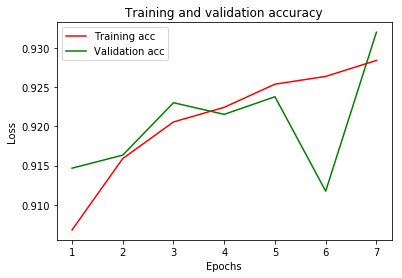

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [19]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
    if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
        layer.trainable = False

In [20]:
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
    print (colored(layer.name, 'blue'))
    print (colored(layer.trainable, 'red'))

conv2d_1
False
batch_normalization_1
False
activation_1
False
max_pooling2d_1
False
conv2d_2
False
batch_normalization_2
False
activation_2
False
max_pooling2d_2
False
conv2d_3
False
batch_normalization_3
False
activation_3
False
max_pooling2d_3
False
flatten_1
False
dense_1
True
batch_normalization_4
False
activation_4
False
dropout_1
False
dense_2
True
activation_5
False


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [21]:
train_features_gte5 = x_train_gte5.astype('float32')/255
test_features_gte5 = x_test_gte5.astype('float32')/255
train_labels_gte5 = keras.utils.to_categorical(y_train_gte5, 10)
test_labels_gte5 = keras.utils.to_categorical(y_test_gte5, 10)

In [22]:
print(train_labels_gte5.shape)
print(test_labels_gte5.shape)

(25000, 10)
(5000, 10)


In [23]:
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
    print (colored(layer.name, 'blue'))
    print (colored(layer.trainable, 'red'))

conv2d_1
False
batch_normalization_1
False
activation_1
False
max_pooling2d_1
False
conv2d_2
False
batch_normalization_2
False
activation_2
False
max_pooling2d_2
False
conv2d_3
False
batch_normalization_3
False
activation_3
False
max_pooling2d_3
False
flatten_1
False
dense_1
True
batch_normalization_4
False
activation_4
False
dropout_1
False
dense_2
True
activation_5
False


In [24]:
model.layers

In [25]:
trans_model = Sequential(model.layers[:13])

In [26]:
trans_model.add(Dense(256))
trans_model.add(Activation('relu'))
trans_model.add(Dropout(0.25))
trans_model.add(Dense(10))
trans_model.add(Activation('softmax'))
trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
__________

In [27]:
trans_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [28]:
output_transfer = trans_model.fit(train_features_gte5, train_labels_gte5, batch_size = 256, epochs = 20,verbose = 2,
          validation_data= (test_features_gte5, test_labels_gte5))

Train on 25000 samples, validate on 5000 samples
Epoch 1/20
 - 59s - loss: 0.9329 - acc: 0.6458 - val_loss: 0.9368 - val_acc: 0.6320
Epoch 2/20
 - 58s - loss: 0.7111 - acc: 0.7346 - val_loss: 0.8137 - val_acc: 0.6826
Epoch 3/20
 - 57s - loss: 0.6495 - acc: 0.7581 - val_loss: 0.8363 - val_acc: 0.6818
Epoch 4/20
 - 58s - loss: 0.6099 - acc: 0.7759 - val_loss: 0.7923 - val_acc: 0.6990
Epoch 5/20
 - 57s - loss: 0.5804 - acc: 0.7844 - val_loss: 0.8328 - val_acc: 0.6856
Epoch 6/20
 - 57s - loss: 0.5516 - acc: 0.7946 - val_loss: 0.7708 - val_acc: 0.7148
Epoch 7/20
 - 58s - loss: 0.5369 - acc: 0.8022 - val_loss: 0.7305 - val_acc: 0.7266
Epoch 8/20
 - 57s - loss: 0.5184 - acc: 0.8078 - val_loss: 0.7548 - val_acc: 0.7174
Epoch 9/20
 - 57s - loss: 0.5008 - acc: 0.8161 - val_loss: 0.6639 - val_acc: 0.7478
Epoch 10/20
 - 55s - loss: 0.4850 - acc: 0.8189 - val_loss: 0.6971 - val_acc: 0.7434
Epoch 11/20
 - 57s - loss: 0.4717 - acc: 0.8258 - val_loss: 0.7257 - val_acc: 0.7344
Epoch 12/20
 - 62s - loss

In [29]:

output_transfer_model_train = trans_model.evaluate(train_features_gte5, train_labels_gte5)
output_transfer_model_test = trans_model.evaluate(test_features_gte5, test_labels_gte5)

5000/5000 [==============================] - 13s 3ms/step


In [30]:
print('Transfer Model Train Accuracy:', output_transfer_model_train[1] * 100, "%")
print('Transfer Model Test accuracy:', output_transfer_model_test[1] * 100, "%")

Transfer Model Train Accuracy: 79.448 %
Transfer Model Test accuracy: 75.42 %


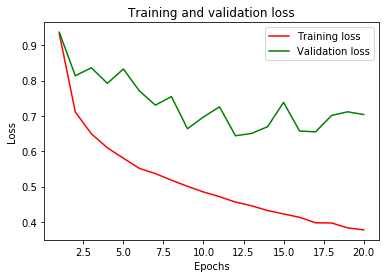

In [31]:
import matplotlib.pyplot as plt

loss = output_transfer.history['loss']
val_loss = output_transfer.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

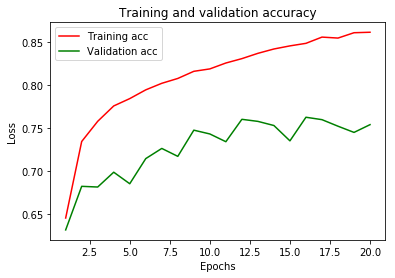

In [32]:
acc = output_transfer.history['acc']
val_acc = output_transfer.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information

<img src="2.png">

### 6. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [2]:
import pandas as pd
data = pd.read_csv('./tweets.csv', encoding = "ISO-8859-1").dropna()

In [3]:
data.shape

(3291, 3)

In [4]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [5]:
data = data[(data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [6]:
data.shape

(3191, 3)

### 7. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
vect = CountVectorizer()
cv_dtm = vect.fit_transform(data['tweet_text'])

In [9]:
cv_dtm.shape

(3191, 5648)

In [10]:
print(cv_dtm)

  (0, 4772)	1
  (0, 4619)	1
  (0, 3706)	1
  (0, 5230)	1
  (0, 5014)	1
  (0, 3304)	1
  (0, 1290)	1
  (0, 5373)	1
  (0, 2663)	1
  (0, 4145)	1
  (0, 417)	2
  (0, 5144)	1
  (0, 2426)	1
  (0, 227)	1
  (0, 2641)	1
  (0, 79)	1
  (0, 2286)	1
  (0, 5416)	1
  (1, 5113)	1
  (1, 1968)	1
  (1, 2103)	1
  (1, 3960)	1
  (1, 4942)	1
  (1, 281)	1
  (1, 1351)	1
  :	:
  (3189, 4595)	1
  (3189, 1816)	1
  (3189, 798)	1
  (3189, 4710)	1
  (3189, 4203)	1
  (3189, 286)	1
  (3189, 3209)	1
  (3189, 2486)	1
  (3189, 800)	1
  (3189, 5247)	1
  (3189, 2275)	1
  (3189, 5277)	1
  (3189, 4784)	1
  (3189, 3280)	1
  (3189, 302)	2
  (3189, 1936)	2
  (3189, 347)	1
  (3189, 2631)	1
  (3189, 4772)	1
  (3189, 2663)	1
  (3189, 2641)	1
  (3190, 1699)	1
  (3190, 2909)	1
  (3190, 2631)	1
  (3190, 4772)	1


### 8. Find number of different words in vocabulary

#### Tip: To see all available functions for an Object use dir

In [51]:
dir(cv_dtm)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_binopt',
 '_boolean_index_to_array',
 '_check_boolean',
 '_check_ellipsis',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix_

### Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [12]:
pd.value_counts(data['is_there_an_emotion_directed_at_a_brand_or_product'])

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

###  Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'label'

Hint: use map on that column and give labels

In [13]:
data['label'] = data.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1, 'Negative emotion':0})

### 9. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split

X = data.tweet_text
y = data.label

In [15]:
X.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 10. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


def logistic_reg(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    logreg = LogisticRegression()
    logreg.fit(X_train_dtm, y_train)
    y_pred_class = logreg.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

## 11. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [44]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [45]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)
logistic_reg(vect)

Features:  24855
Accuracy:  0.8558897243107769
Features:  24855


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.8659147869674185


In [46]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  24855
Accuracy:  0.8558897243107769


### 12. Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [47]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words= 'english')
tokenize_test(vect)
logistic_reg(vect)

Features:  19126
Accuracy:  0.8583959899749374
Features:  19126
Accuracy:  0.8671679197994987


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 13. Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [48]:
vect = CountVectorizer( max_features= 300)
tokenize_test(vect)
logistic_reg(vect)

Features:  300
Accuracy:  0.8145363408521303
Features:  300
Accuracy:  0.8383458646616542


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 14. Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [49]:
vect = CountVectorizer(ngram_range=(1, 2),  max_features = 15000)
tokenize_test(vect)
logistic_reg(vect)

Features:  15000
Accuracy:  0.8533834586466166
Features:  15000
Accuracy:  0.8671679197994987


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 15. Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [50]:
vect = CountVectorizer(ngram_range=(1, 2),  min_df = 2)
tokenize_test(vect)
logistic_reg(vect)

Features:  7764
Accuracy:  0.8583959899749374
Features:  7764
Accuracy:  0.8771929824561403


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
